In [148]:
TITLE="Histograms of selected metrics"
RED_OP="rgba(255, 0, 0, 0.2)"
RED_FULL="rgba(255, 0, 0, 1)"
DEFAULT_LEGEND = {
    "xanchor": "right",
    "yanchor": "top",
    "x": 1,
    "y": 1,
}

LINES_ENDED_WITH_PUNC_LAYOUT = {
    "title": {
        "text": TITLE
    },
    "xaxis": {
        "title": {
            "text": "Fraction of lines ended with punctuation"
        },
        "range": [0, 1.0]
    },
    "yaxis": {
        "title": {
            "text": "Document Frequency"
        },
        "range": [0, 0.15]
    },
    "shapes": [
        {
            "type": "rect",
            "x0": 0.0,
            "y0": 0.0,
            "x1": 0.12,
            "y1": 0.15,
            "xref": "x",
            "yref": "y",
            "line": {
                "color": RED_FULL,
                "width": 1,
                "dash": "dashdot"
            },
            "fillcolor": RED_OP
        }
    ],
    "annotations": [
        {
            "text": "Filtered out",
            "x": 0.065,
            "y": 0.075,
            "xref": "x",
            "yref": "y",
            "font": {
                "size": 10
            },
            "showakkkkkkkrrow": False
        }
    ],
    "legend": DEFAULT_LEGEND
}

LINES_CHARS = {
    "title": {
        "text": TITLE
    },
    "xaxis": {
        "title": {
            "text": "Fraction of chars in duplicated lines"
        },
        "range": [0, 0.05]
    },
    "yaxis": {
        "range": [0, 0.015]
    },
    "shapes": [
        {
            "type": "rect",
            "x0": 0.01,
            "y0": 0.0,
            "x1": 1.0,
            "y1": 1.0,
            "xref": "x",
            "yref": "y",
            "line": {
                "color": RED_FULL,
                "width": 1,
                "dash": "dashdot"
            },
            "fillcolor": RED_OP
        }
    ],
    "annotations": [
        {
            "text": "Filtered out",
            "x": 0.03,
            "y": 0.007,
            "xref": "x",
            "yref": "y",
            "font": {
                "size": 10
            },
            "showarrow": False
        }
    ],
    "legend": DEFAULT_LEGEND
}

SHORT_LINES = {
    "title": {
        "text": TITLE
    },
    "xaxis": {
        "title": {
            "text": "Fraction of lines shorter than 30 chars"
        }
    },
    "yaxis": {
        "range": [0.0, 0.1]
    },
    "shapes": [
        {
            "type": "rect",
            "x0": 0.67,
            "y0": 0.0,
            "x1": 1.0,
            "y1": 0.1,
            "xref": "x",
            "yref": "y",
            "line": {
                "color": RED_FULL,
                "width": 1,
                "dash": "dashdot"
            },
            "fillcolor": RED_OP,
            "showarrow": False
        }
    ],
    "annotations": [
        {
            "text": "Filtered out",
            "x": 0.83,
            "y": 0.05,
            "xref": "x",
            "yref": "y",
            "font": {
                "size": 10
            },
            "showarrow": False
        }
    ],
    "legend": DEFAULT_LEGEND
}

In [149]:
# For dedup-terminal-punct.json, use
from collections import defaultdict
import pandas as pd
# indvidual_dedup_ouput_{CC-MAIN-2013-48}
# indvidual_dedup_ouput_{CC-MAIN-2013-48}
import json

import numpy as np

MAX_DATA_POINTS = 1000

def prepare_histogram(data, normalize=True, digits=2):
    rounded = defaultdict(int)
    for k, v in data.items():
        rounded[round(float(k), digits)] += v["total"]
    data = rounded


    print(data)
    x, y = zip(*data.items())
    x = [float(i) for i in x]
    y = [i for i in y]
    if len(x) > MAX_DATA_POINTS:
        df = pd.DataFrame({"x": x, "y": y})
        df["bin"] = pd.qcut(x, q=MAX_DATA_POINTS)
        binned = df.groupby("bin").agg({"y": "sum"}).reset_index()
        x = binned["bin"].apply(lambda x: x.mid).values.tolist()
        y = binned["y"].tolist()
    if normalize:
        y = np.array(y)
        y = (y / y.sum()).tolist()
    # Sort by x
    x, y = zip(*sorted(zip(x, y)))
    return {
        "x": x,
        "y": y
    }


In [150]:
import json
import os

def get_plot_name(name):
    return name.replace(" ", "-").lower()
TABBED_PLOT = {}

OUTPUT_DIR = "data/plots/stats"

with open("data/lines_ending_with_terminal_mark_ratio.json", "r") as f:
    data = json.load(f)
    print(data)
    histograms = {k: {**prepare_histogram(v, digits=2)} for k, v in data.items()}
    TABBED_PLOT["lines_ended_with_punct"] = {
        "data": histograms,
        "layout": LINES_ENDED_WITH_PUNC_LAYOUT
    }

with open("data/line_char_duplicates_v2.json", "r") as f:
    data = json.load(f)
    histograms = {k: {**prepare_histogram(v, digits=3)} for k, v in data.items()}
    TABBED_PLOT["lines_chars"] = {
        "data": histograms,
        "layout": LINES_CHARS
    }

with open("data/short_line_ratio_chars_30.json", "r") as f:
    data = json.load(f)
    histograms = {k: {**prepare_histogram(v, digits=2)} for k, v in data.items()}
    TABBED_PLOT["short_lines"] = {
        "data": histograms,
        "layout": SHORT_LINES
    }

# Create the folders
os.makedirs(OUTPUT_DIR, exist_ok=True)


for name, plot in TABBED_PLOT.items():
    with open(f"{OUTPUT_DIR}/{name}.json", "w") as f:
        json.dump(plot, f)

with open(f"{OUTPUT_DIR}/index.json", "w") as f:
    mapping = {k: {
        "file": f"{k}.json"
    } for k in TABBED_PLOT.keys()}
    json.dump({
        "files": mapping,
        "settings": {
            "defaultMetric": "lines_ended_with_punct",
            "autoSetXRange": False,
            "slider": None
        }
    }, f)




{'dedup_minhash_CC-MAIN-2013-48_output': {'0.13': {'total': 55417, 'unit': 'task'}, '0.167': {'total': 416047, 'unit': 'task'}, '0.067': {'total': 126355, 'unit': 'task'}, '0.389': {'total': 39283, 'unit': 'task'}, '0.25': {'total': 634665, 'unit': 'task'}, '0.286': {'total': 328283, 'unit': 'task'}, '0.462': {'total': 59057, 'unit': 'task'}, '0.0': {'total': 2645086, 'unit': 'task'}, '0.019': {'total': 15262, 'unit': 'task'}, '0.714': {'total': 163158, 'unit': 'task'}, '0.5': {'total': 1233262, 'unit': 'task'}, '0.312': {'total': 67994, 'unit': 'task'}, '1.0': {'total': 2078368, 'unit': 'task'}, '0.818': {'total': 58890, 'unit': 'task'}, '0.255': {'total': 10536, 'unit': 'task'}, '0.125': {'total': 305825, 'unit': 'task'}, '0.083': {'total': 196613, 'unit': 'task'}, '0.833': {'total': 220685, 'unit': 'task'}, '0.625': {'total': 131336, 'unit': 'task'}, '0.154': {'total': 137641, 'unit': 'task'}, '0.008': {'total': 3046, 'unit': 'task'}, '0.4': {'total': 406515, 'unit': 'task'}, '0.172

[42.917500000000004,
 124.00399999999999,
 204.54,
 285.076,
 365.61199999999997,
 446.148,
 526.684,
 607.22,
 687.7560000000001,
 768.2919999999999,
 848.828,
 929.364,
 1009.8999999999999,
 1090.436,
 1170.972,
 1251.508,
 1332.0439999999999,
 1412.58,
 1493.116,
 1573.652,
 1654.188,
 1734.724,
 1815.26,
 1895.796,
 1976.3319999999999,
 2056.868,
 2137.404,
 2217.94,
 2298.476,
 2379.012,
 2459.548,
 2540.084,
 2620.62,
 2701.156,
 2781.692,
 2862.228,
 2942.764,
 3023.3,
 3103.8360000000002,
 3184.372,
 3264.908,
 3345.444,
 3425.98,
 3506.516,
 3587.052,
 3667.588,
 3748.124,
 3828.66,
 3909.196,
 3989.732,
 4070.268,
 4150.804,
 4231.34,
 4311.876,
 4392.412,
 4472.948,
 4553.484,
 4634.07,
 4714.656,
 4795.192,
 4875.778,
 4956.414,
 5037.2,
 5118.436,
 5199.6720000000005,
 5280.908,
 5362.694,
 5444.780000000001,
 5527.166,
 5610.352000000001,
 5694.238,
 5779.474,
 5865.66,
 5951.796,
 6039.532,
 6129.968000000001,
 6224.154,
 6319.6900000000005,
 6416.226000000001,
 6517.162

In [148]:
binned.index

CategoricalIndex([       (2.099, 83.736],      (83.736, 164.272],
                      (164.272, 244.808],     (244.808, 325.344],
                       (325.344, 405.88],      (405.88, 486.416],
                      (486.416, 566.952],     (566.952, 647.488],
                      (647.488, 728.024],      (728.024, 808.56],
                       (808.56, 889.096],     (889.096, 969.632],
                     (969.632, 1050.168],   (1050.168, 1130.704],
                     (1130.704, 1211.24],    (1211.24, 1291.776],
                    (1291.776, 1372.312],   (1372.312, 1452.848],
                    (1452.848, 1533.384],    (1533.384, 1613.92],
                     (1613.92, 1694.456],   (1694.456, 1774.992],
                    (1774.992, 1855.528],   (1855.528, 1936.064],
                      (1936.064, 2016.6],     (2016.6, 2097.136],
                    (2097.136, 2177.672],   (2177.672, 2258.208],
                    (2258.208, 2338.744],    (2338.744, 2419.28],
          

In [81]:
l = zip(*data[dataset])

In [45]:
kklist(l)

[(14512, 2.1),
 (14522, 1454.3019999999997),
 (14522, 2906.5039999999995),
 (14321, 4358.706),
 (11209, 5810.907999999999),
 (5650, 7263.109999999999),
 (2620, 8715.312),
 (1273, 10167.514),
 (659, 11619.715999999999),
 (404, 13071.917999999998),
 (247, 14524.119999999997),
 (156, 15976.321999999998),
 (89, 17428.523999999998),
 (57, 18880.725999999995),
 (42, 20332.927999999996),
 (34, 21785.129999999994),
 (32, 23237.331999999995),
 (12, 24689.533999999996),
 (21, 26141.735999999994),
 (17, 27593.937999999995),
 (9, 29046.139999999992),
 (7, 30498.341999999993),
 (12, 31950.543999999994),
 (13, 33402.74599999999),
 (12, 34854.948),
 (8, 36307.149999999994),
 (7, 37759.35199999999),
 (9, 39211.55399999999),
 (8, 40663.755999999994),
 (7, 42115.95799999999),
 (1, 43568.15999999999),
 (4, 45020.361999999994),
 (5, 46472.56399999999),
 (5, 47924.76599999999),
 (1, 49376.96799999999),
 (1, 50829.16999999999),
 (2, 52281.37199999999),
 (4, 53733.57399999999),
 (3, 55185.77599999999),
 (1, 

In [12]:
def rename_dataset(dataset_name, short=False):
    """
    Simplify the dataset names based on the given patterns.
    
    Args:
    dataset_name (str): The original name of the dataset.
    
    Returns:
    str: The simplified name of the dataset.
    """
    if "dedup_minhash_CC-MAIN-" in dataset_name:
        year = dataset_name.split("CC-MAIN-")[1][:4]
        week = dataset_name.split("CC-MAIN-")[1][4:6]
        return f"Full MinHash CC-{year}-{week}"
    elif "dedup_minhash_independent_output_CC-MAIN-" in dataset_name:
        year_week = dataset_name.split("CC-MAIN-")[1][:8]
        if short:
            return f"{year_week}"
        return f"Individual MinHash CC-{year_week}"
    elif "allenai_c4_en" in dataset_name:
        return "C4 English"
    elif "dedup_minhash_independent_output" in dataset_name:
        return "Individual MinHash"
    elif "dedup_minhash_output" in dataset_name:
        return "Full MinHash"
    elif "dolma-sample" in dataset_name:
        return "Dolma1.6 CC"
    elif "tiiuae_falcon-refinedweb_data" in dataset_name:
        return "RefinedWeb"
    elif "pii_removed" in dataset_name:
        return "FineWeb (ours)"
    else:
        return dataset_name  # Return the original name if it doesn't match any pattern


In [ ]:
data["global-length.json"].keys()

dict_keys(['pii_removed', 'allenai_c4_en', 'tiiuae_falcon-refinedweb_data', 'dolma-sample'])

allenai_c4_en
dolma-sample
pii_removed
tiiuae_falcon-refinedweb_data
allenai_c4_en
dolma-sample
pii_removed
tiiuae_falcon-refinedweb_data
pii_removed
allenai_c4_en
tiiuae_falcon-refinedweb_data
dolma-sample
pii_removed
allenai_c4_en
tiiuae_falcon-refinedweb_data
dolma-sample


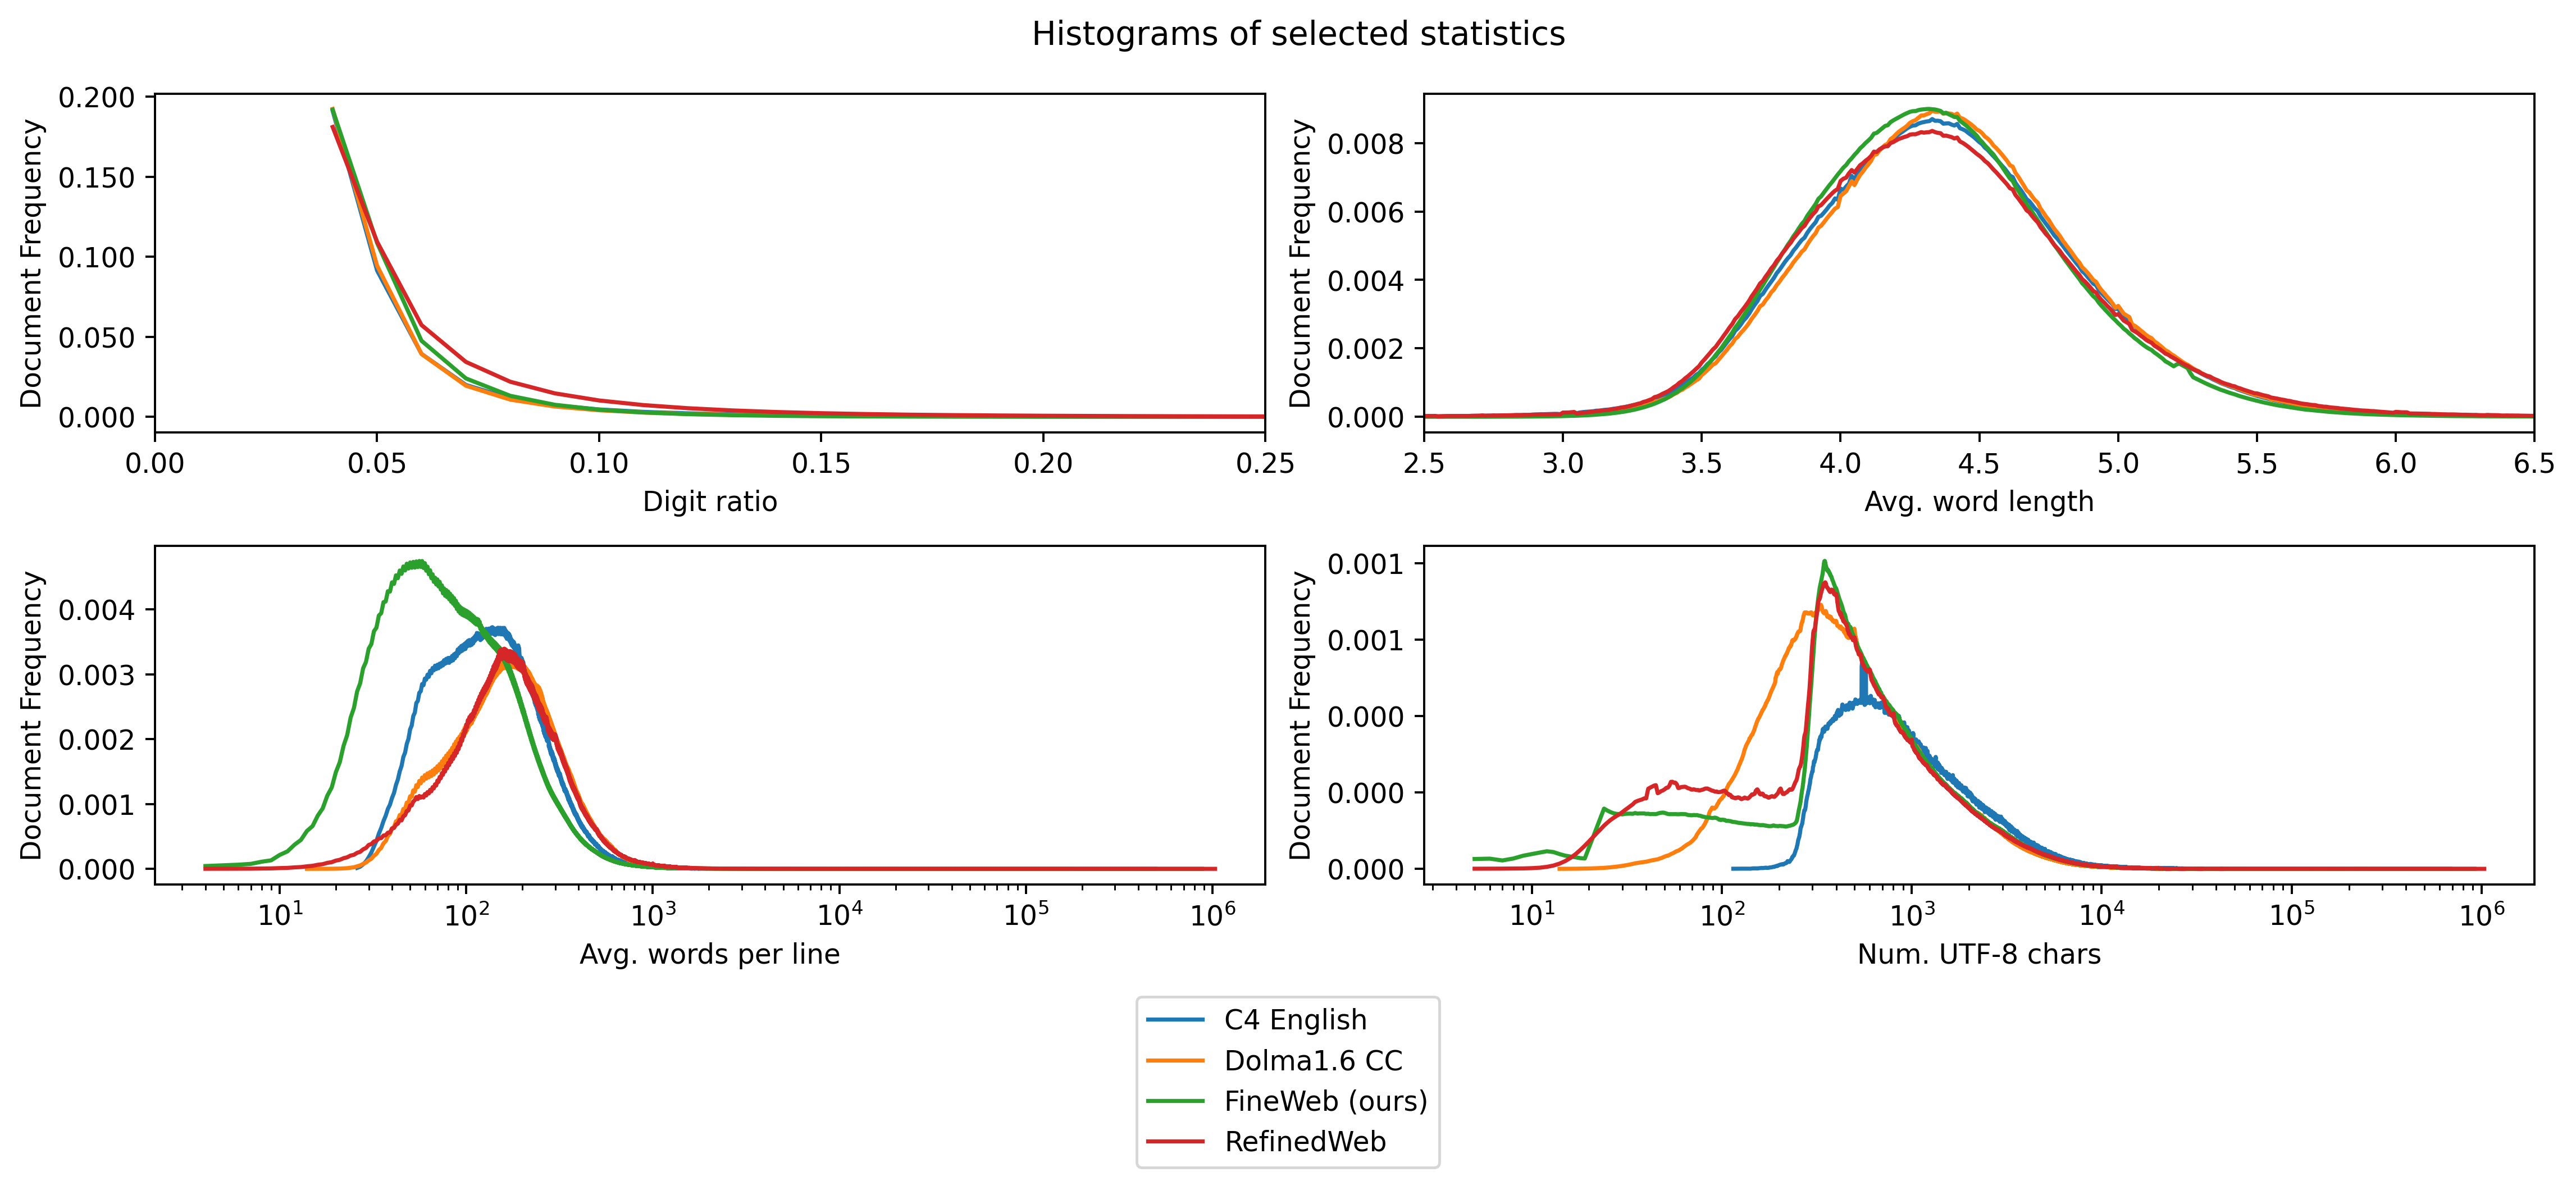

In [ ]:
from collections import defaultdict

import pandas as pd


def get_setting(name):
    if "terminal-punct" in name:
        return {"x": "Fraction of lines ended with punctuation", "ylim": (0, 0.1)}
    
    if "line-dedup" in name:
        return {"x": "Fraction of chars in duplicated lines", "xlim": (0, 0.1), "ylim": (0,0.02)}
    
    if "short-line" in name:
        return {"x": "Fraction of lines shorter than 30 chars", "xlim": (0.4, 1.0), "ylim": (0,0.05)}
    
    if "avg_words_per_line" in name:
        return {"x": "Avg. words per line", "x-log": True, "x-log": True, "round": 0}
    if "avg_line_length" in name:
        return {"x": "Avg. words per line", "x-log": True, "round": 0}
    
    if "global-length.json" == name:
        return {"x": "Num. UTF-8 chars", "x-log": True}
    
    if "global-digit_ratio.json" == name:
        return {"x": "Digit ratio", "xlim": (0, 0.25)}
    
    if "global-avg_word_length.json" == name:
        return {"x": "Avg. word length", "xlim": (2.5, 6.5)}

    
    raise ValueError(f"Unknown dataset name: {name}")


def plot_scatter(data):
    """
    Plot scatter plots with smoothing for each dataset in the data list on a single grid.
    Each dataset is expected to be a dictionary with the first key as the dataset name,
    and the value as another dictionary where keys are data points and values are their counts.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Determine the number of plots and create a subplot grid
    num_datasets = len(data)
    cols = 2  # Define number of columns in the grid
    rows = (num_datasets) // cols  # Calculate the required number of rows
    fig, axs = plt.subplots(rows, cols, figsize=(8 * cols, 3 * rows), dpi=350)
    if rows * cols > 1:
        axs = axs.flatten()  # Flatten the array of axes if more than one subplot
    else:
        axs = [axs]  # Encapsulate the single AxesSubplot object into a list for uniform handling

    plot_index = 0
    legend_handles = []  # List to store handles for the legend
    legend_labels = []  # List to store labels for the legend
    for name, dataset in data.items():
        setting = get_setting(name)
        ax = axs[plot_index]
        if "name" in setting:
            ax.set_title(setting["name"])
        if "x" in setting:
            ax.set_xlabel(setting["x"])
        if "xlim" in setting:
            ax.set_xlim(setting["xlim"])
        if "ylim" in setting:
            ax.set_ylim(setting["ylim"])
        if "x-log" in setting:
            ax.set_xscale('log')

        # Use 2 decimal places for the y-axis labels
        ax.yaxis.set_major_formatter('{x:.3f}')


        plot_index += 1
        # Each dataset may contain multiple lines
        for i, (line_name, line_data) in enumerate(dataset.items()):
            if "round" in setting:
                tmp_line_data = defaultdict(list)
                for p, p_v in line_data.items():
                    rounded_key = str(round(float(p), setting["round"]))
                    tmp_line_data[rounded_key].append(p_v)

                # If you want to sum the values that have the same rounded key
                tmp_line_data = {k: sum(v) for k, v in tmp_line_data.items()}
                line_data = tmp_line_data
            
            # Check that if you sum the values you get 1
            assert sum(line_data.values()) == 1

            # Add smoothing for 4-5 points
            # Implementing smoothing using a rolling window
            line_name = rename_dataset(line_name)
            # Sorting the line data by keys
            sorted_line_data = dict(sorted(line_data.items(), key=lambda item: float(item[0])))

            window_size = setting.get("window_size", 5)  # Define the window size for smoothing
            x = np.array(list(sorted_line_data.keys()), dtype=float)
            y = np.array(list(sorted_line_data.values()), dtype=float)
            if len(y) >= window_size:  # Ensure there are enough points to apply smoothing
                # Convert y to a pandas Series to use rolling function
                y_series = pd.Series(y)
                # Apply rolling window and mean to smooth the data
                y_smoothed = y_series.rolling(window=window_size).mean()
                # Drop NaN values that result from the rolling mean calculation
                y_smoothed = y_smoothed.dropna()
                # Update x to correspond to the length of the smoothed y
                x = x[len(x) - len(y_smoothed):]
                y = y_smoothed.to_numpy()  # Convert back to numpy array for plotting



            # Use the line name as the label to unify same line names across different plots

            line, = ax.plot(x, y, label=line_name)  # Use default colors
            if line_name not in legend_labels:
                legend_handles.append(line)
                legend_labels.append(line_name)

    # Place a single shared legend on the top of the figure
    fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', ncol=1)
    for ax in axs:
        ax.set_ylabel('Document Frequency')

    fig.suptitle("Histograms of selected statistics")
    plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust the layout to make room for the legend
    fig.set_size_inches(13, 6)  # Set the figure size to 18 inches by 12 inches
    plt.show()

plot_scatter(data)


# For summary stats

In [40]:
import os
import json
data_folder = './data-stats/cont/'
json_files = [f for f in os.listdir(data_folder) if f.endswith('.json')]

data = {}
for file in json_files:
    with open(os.path.join(data_folder, file), 'r') as f:
        data[file] = json.load(f)


In [41]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv("commoncrawl_new_fixed_dumps.csv")

# Function to convert URL names into a more standardized format using regex
def standardize_run_name(url):
    # Either they contain CC
    match = re.search(r"(\d{4})-(\d{2})", url)
    if match:
        year, month = match.groups()
        return f"{year}-{month}"
    return None



# Rename the stats columns to match the URL names using regex for more flexibility
df["runname"] = df["runname"].apply(lambda x: standardize_run_name(x))

# Select only the runs from the last step == 13500
df = df[df['steps'].isin([13500, 13000, 12500])]

# Average the rows if their run name is the same
df = df.groupby(['runname']).mean().reset_index()


# remove seed column
df = df.drop(columns=["seed"])
# df = df[df['runname'].apply(lambda x: int(x.split('-')[0]) >= 2021)]

# Only take runs which started after 2021
perf_df = df[["runname", "agg_score"]]


# intersection of URL_RUNS and df['runname']
RUNS = sorted(list(set(df['runname'])))




0.4259162414645151


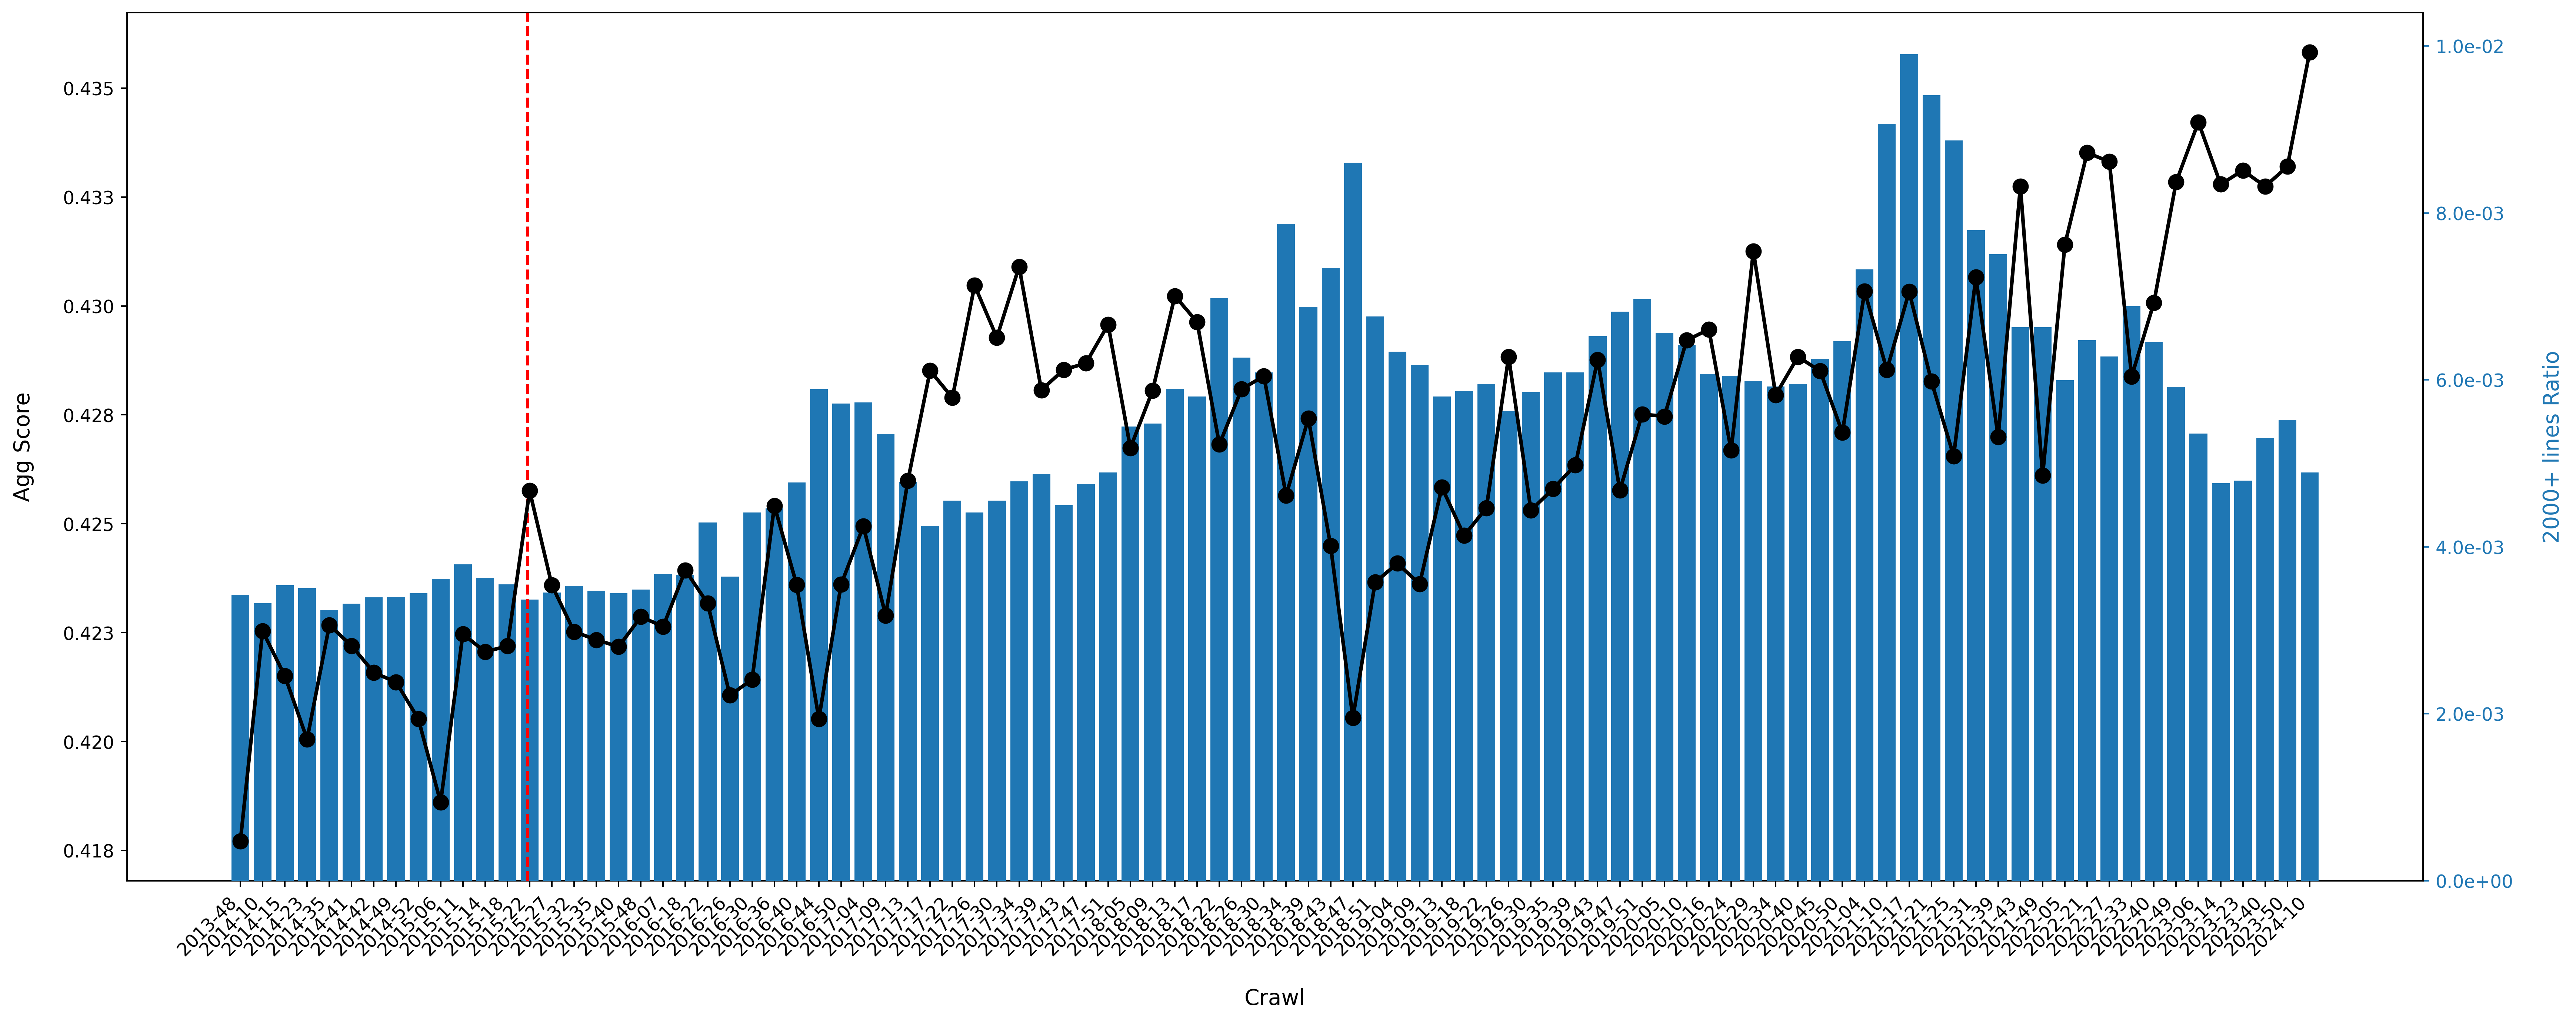

In [54]:
from scipy.signal import detrend
def get_setting(name):
    if "words_contamination" in name:
        return {"y": "Avg. Synthetic Proxy-words Ratio", "x": "Crawl"}
    if "long_line_ratio_chars" in name:
        return {"y": "2000+ lines Ratio", "x": "Crawl"}
    
    raise ValueError(f"Unknown dataset name: {name}")

def plot_bar(data, add_perf=False):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.ticker import FuncFormatter

    # Assuming 'data' is a dictionary where keys are labels and values are the heights of the bars
    name = list(data.keys())[0]
    data = data[name]
    # Update data so that it contains only dates bigger than 2021
    # data = {k: v for k, v in data.items() if int(k.split('-')[2]) >= 2021}
    # Remove the 2021-10 from data
    # data = {k: v for k, v in data.items() if "2021-04" not in k}

    # Sort the data 
    data = {k: v for k, v in sorted(data.items(), key=lambda item: item[0])}

    settings = get_setting(name)  # Use get_setting to determine plot settings

    labels = list(data.keys())
    # Rename the labels
    labels = [rename_dataset(x, short=True) for x in labels]
    values = [x["summary"]["mean"] for x in data.values()]

    fig, ax = plt.subplots(figsize=(20, 8))
    num_bars = len(data)
    if add_perf:
        # Retrieve performance data for the labels
        perf_values = [perf_df[perf_df['runname'] == label]['agg_score'].values[0] for label in labels]
        # Remove trend from the data





        # Compute pearson correlation
        pearson_corr = np.corrcoef(values, perf_values)[0, 1]
        print(pearson_corr)
        ax_tmp = ax.twinx()
        ax2 = ax
        ax = ax_tmp
        ax2.plot(labels, perf_values, 'o-', label='Agg score', linewidth=2, markerfacecolor='black', color='black', markersize=8, zorder=10)
        ax2.set_ylabel('Agg Score', color='black', fontsize=12, labelpad=16)
        ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.3f}'))
        ax2.tick_params(axis='y', colors='black')
    bars = ax.bar(range(num_bars), values, tick_label=labels, color='tab:blue', alpha=1.0, zorder=12)  # Changed color to match the image
    # Remove 'CC-' prefix from x labels if present

    # Improving the aesthetics
    # Add a horizontal line with label
    ax2.axvline(x=12.9, color='red', linestyle='--', linewidth=1.5)  # Horizontal line at y=0.5
    # ax2.text(11.2, 0.9, 'Chat-GPT Release', transform=ax.get_xaxis_transform(), ha='center', va='bottom', color='red', fontsize=10)
    ax.set_xlabel(settings.get("x", "Crawl"), fontsize=12)  # Set x-axis label using settings
    ax.set_ylabel(settings.get("y", "Average fraction"), fontsize=12, labelpad=16)  # Set y-axis label
    # ax.set_title('Synthetic Data Contamination', fontsize=16)  # Set title
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1e}'))

    ax.set_zorder(2)
    if add_perf:
        ax2.set_frame_on(False)
        ax2.set_zorder(3)
        ax2.tick_params(axis='x', rotation=45)
        for label in ax2.get_xticklabels():
            label.set_horizontalalignment('right')
        ax.tick_params(axis='y', colors='tab:blue')
        # ax.set_ylabel('Synthetic Proxy Words Ratio (Old)', color='tab:blue', fontsize=12, labelpad=16)
        ax.set_ylabel('2000+ lines Ratio', color='tab:blue', fontsize=12, labelpad=16)
        ax2.set_xlabel('Crawl', fontsize=12, labelpad=16)
        # 
    else:
        ax.tick_params(axis='x', rotation=45)
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')
        

    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.gcf().set_dpi(350)  # Set the DPI for the l
    plt.show()

# Example usage
plot_bar(data, add_perf=True)

In [ ]:
import boto3

from datatrove.io import get_datafolder
f1 = get_datafolder("s3://fineweb-stats/summary")
f2 = get_datafolder("s3://fineweb-data-processing-tmp-us-east-1/fineweb-stats-tmp")


In [ ]:
files = f2.glob("**/metric.json")

KeyboardInterrupt: 

In [ ]:
files

[]

In [ ]:
r

In [ ]:
for file in files:
    new_name = file.replace("stats-merged.json", "metric.json")
    print(f"{file} -> {new_name}")
    f.copy(file, new_name)
    # delete the original file
    f.delete(file)



dedup_minhash_independent_output_CC-MAIN-2018-05/suffix/long_word_ratio_7/stats-merged.json -> dedup_minhash_independent_output_CC-MAIN-2018-05/suffix/long_word_ratio_7/metric.json


FileNotFoundError: fineweb-stats/summary/dedup_minhash_independent_output_CC-MAIN-2018-05/suffix/long_word_ratio_7/stats-merged.json

In [ ]:
files

['dedup_minhash_independent_output_CC-MAIN-2019-51/histogram/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2019-51/summary/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2020-24/histogram/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2020-24/summary/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2020-45/histogram/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2020-45/summary/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2021-10/histogram/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2021-10/summary/words_contaminationdelve_freq/stats-merged.json',
 'dedup_minhash_independent_output_CC-MAIN-2021-25/histogram/words_contaminationdelve_freq/stats-merged.json',
 'dedup_m